In [71]:
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from sqlalchemy import true

class Kmeans():
    def __init__(self, k, max_iteration = 10):
        self.k = k
        self.max_iterations = max_iteration
        self.all_centroids = []
        self.all_labels = []
        
    def fit(self, datasets):
        num_features = datasets.shape[1]
        centroids = self.get_random_centroid(num_features, self.k, datasets)
        print(centroids)
        self.all_centroids.append(centroids)
        self.all_labels.append(None)
        
        
        iterations = 0
        oldCentroid = None
        
        while not self.stop(oldCentroid, centroids, iterations):
            oldCentroids = centroids
            iterations += 1 
            labels = self.get_labels(datasets, centroids)
            self.all_labels.append(labels)
            
            centroids =self.get_centroids(datasets, labels, self.k, oldCentroids, degree_m = 2)
            self.all_centroids.append(centroids)
            
        return centroids
        
        
        
    def get_random_centroid(self, numFeatures, k, datasets):
        centroids= datasets[np.random.choice(datasets.shape[0], 1, replace=False)]
        #print(np.array(centroids).shape)
        centroids = np.array(centroids)
        print(centroids)
        print(centroids)
        for c_id in range(k - 1): 
            #dist = np.zeros((datasets.shape[0], np.array(list).shape[0]))
            print(np.array(centroids).shape)
            dist = cdist(datasets,centroids[:])
           # print(dist)
            min_ = np.argmin(dist, axis = 1)
            print(min_.shape)
            #print(new_)
            new_ = []
            for i in range(min_.shape[0]):
                new_.append([dist[i][min_[i]]])
            #print(new_)
            next_centroid_idx = np.argmax(new_, axis = 0)
            centroids = np.append(centroids,datasets[next_centroid_idx, :], axis = 0)
        
        return centroids
            
            
    
    def get_labels(self, dataset, centroids):
        D = cdist(dataset, centroids)
        return np.argmin(D, axis = 1)
    
    
    def stop(self, old_centroids, centroids, iterations):
        if iterations > self.max_iterations:
            return True
        return np.all(old_centroids == centroids)
    
    def get_centroids(self, dataset, labels, K, centroids, degree_m):
        centers = np.zeros((K, dataset.shape[1]))
        
        
        #print(centroids.shape, '++++')
        for k in range(K):
         #   idx = np.where(np.array(labels) == k)
            Xk = dataset[labels == k,:]
            wk = np.zeros((Xk.shape[0], centroids.shape[0]))
            for i in range(Xk.shape[0]):
                for j in range(centroids.shape[0]):
                    aa = 0
                    for kk in range(centroids.shape[0]):
                        if np.linalg.norm(Xk[i,:]-centroids[j,:]) == 0 or np.linalg.norm(Xk[i, :]-centroids[kk, :]) == 0:
                            aa = 1
                            break
                        else:
                            aa += (np.linalg.norm(Xk[i,:]-centroids[j,:])/np.linalg.norm(Xk[i, :]-centroids[kk, :]))**(2/(degree_m-1))
                    wk[i,j] = 1/aa
            centers[k,:] = np.dot(wk[:,k], Xk) / np.sum(wk[:, k], axis = 0)
        return centers

In [72]:
dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

kmean = Kmeans(k=2, max_iteration=8)
centroids = kmean.fit(dataset)

[[-2.49257224 -0.03496762]]
[[-2.49257224 -0.03496762]]
(1, 2)
(250,)
[[ -2.49257224  -0.03496762]
 [  9.80761774 -10.35235059]]


[[ -2.49257224  -0.03496762]
 [  9.80761774 -10.35235059]]


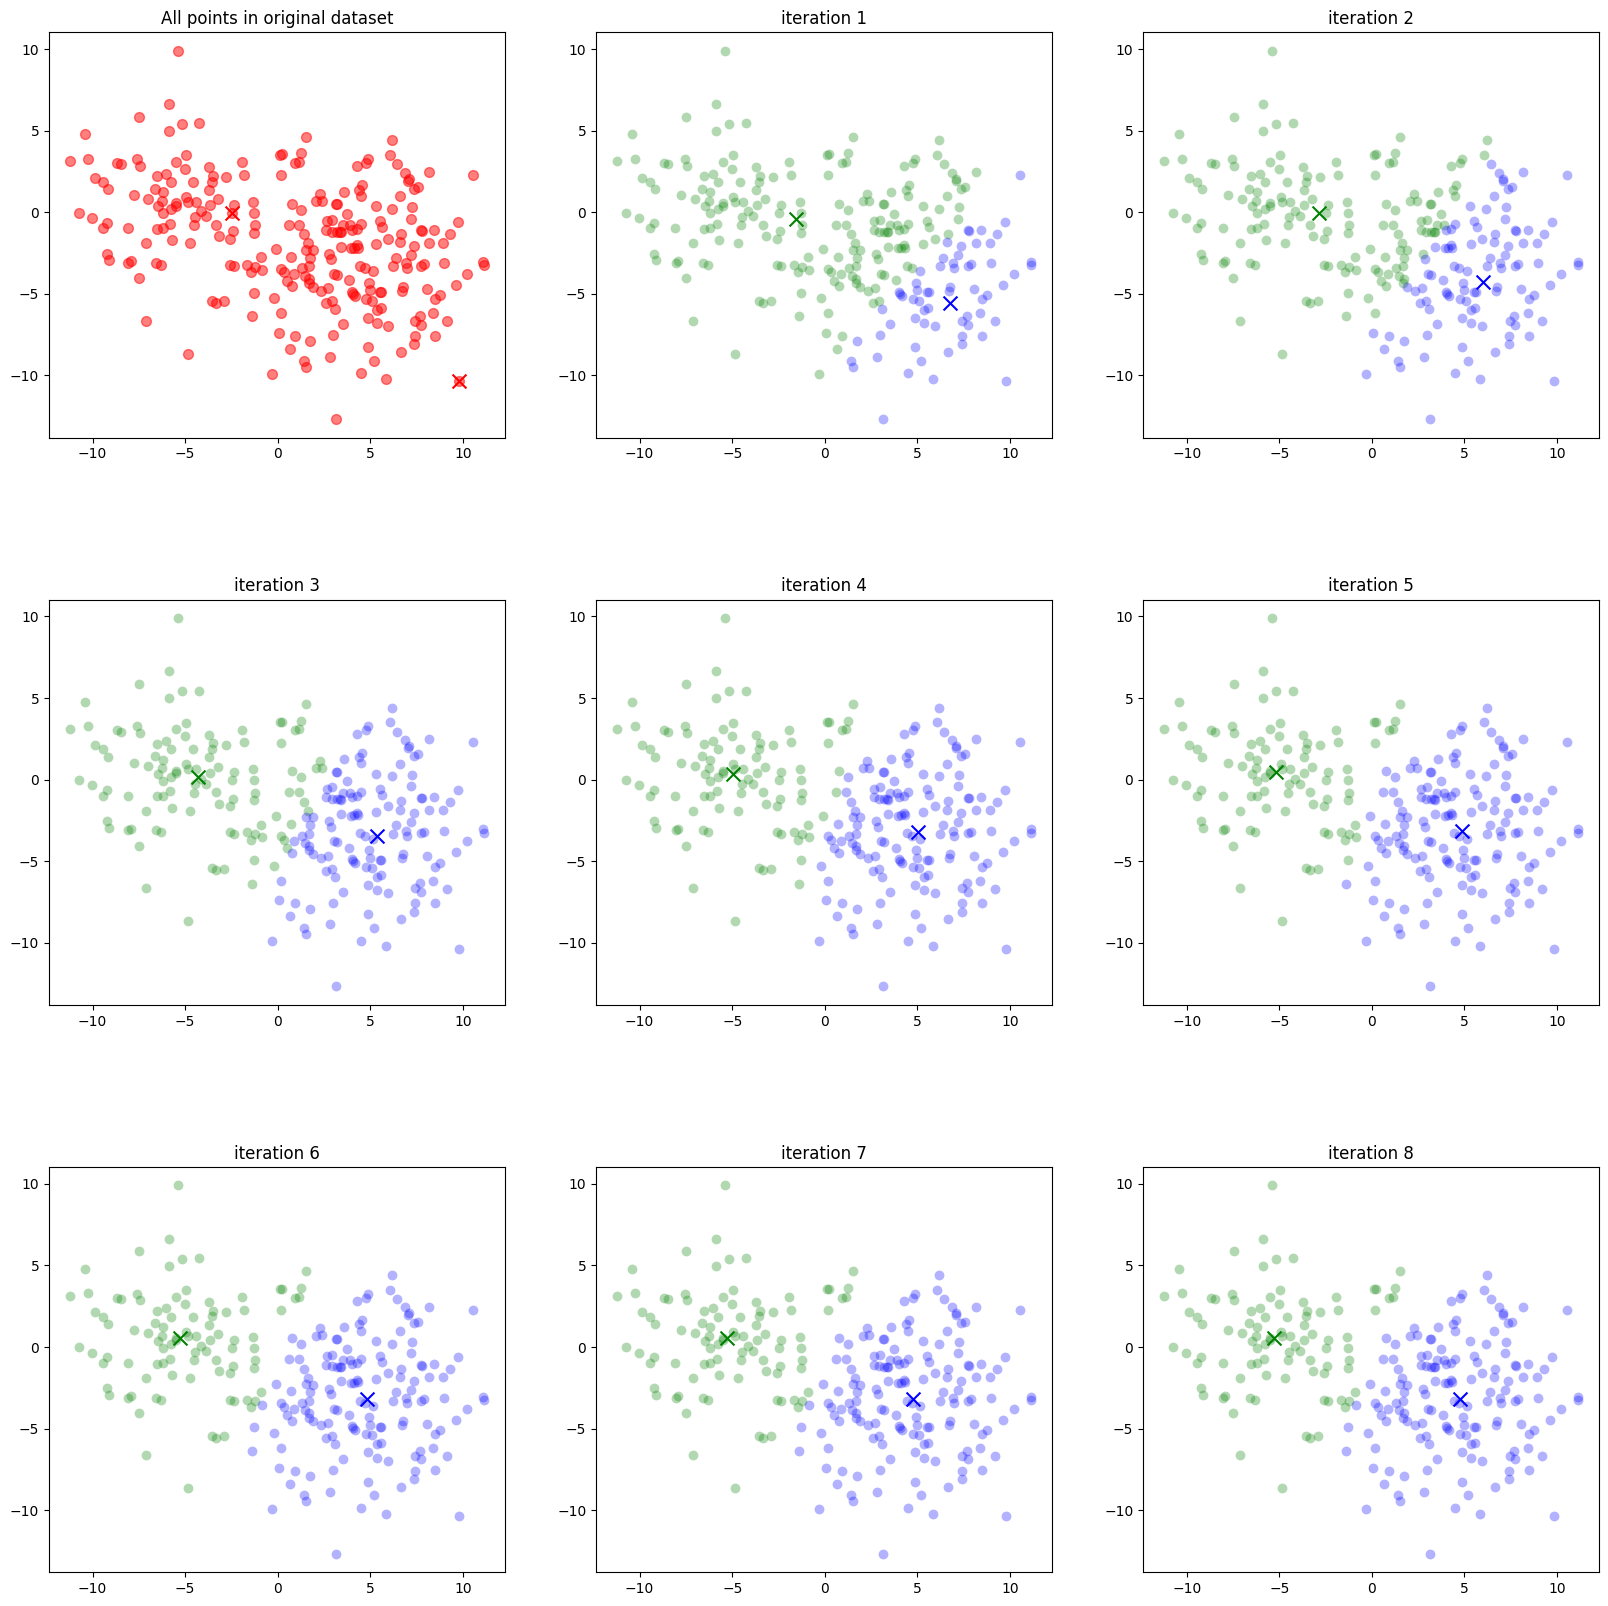

In [73]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = ['green', 'blue']
labels = ['cluster 1', 'cluster 2']

for i in np.arange(len(kmean.all_centroids)-1):
  ax = plt.subplot(gs[i])
  if i == 0:
    centroids_i = kmean.all_centroids[i]
    print(centroids_i)
    plt.scatter(dataset[:, 0], dataset[:, 1], s=50, alpha=0.5, color='red')
    for j in np.arange(kmean.k):
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
    plt.title('All points in original dataset')
  else:
    # Lấy centroids và labels tại bước thứ i
    centroids_i = kmean.all_centroids[i]
    labels_i = kmean.all_labels[i]
    # Visualize các điểm cho từng cụm
    for j in np.arange(kmean.k):
      idx_j = np.where(np.array(labels_i) == j)[0]
      plt.scatter(dataset[idx_j, 0], dataset[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color=colors[j], s=100, label=labels[j])
    plt.title(r'iteration {}'.format(i))